In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True
sys.path.append('./src')
from utils_pde_shock_elasticity import computeElas

# Load Results

In [2]:
def return_solution(Delta, gamma, rho, kappa, beta1, beta2, alpha, action_name):

    zeta = 0.5
    
    outputdir = "./output/"+action_name+"/Delta_"+str(Delta)+'/beta1_'+str(beta1)+'_beta2_'+str(beta2)+"/kappa_"+str(kappa)+"_zeta_"+str(zeta)+"/gamma_"+str(gamma)+"_rho_"+str(rho)+'_alpha_'+str(alpha)+"/"
    res = np.load(outputdir + "res.npz")
    try:
        elasticity_logimo = np.load(outputdir + "elasticity_logimo.npz", allow_pickle=True)
        elasticity_logc = np.load(outputdir + "elasticity_logc.npz", allow_pickle=True)
    except:
        elasticity_logimo = None
        elasticity_logc = None
    
    ## Transform the endogenous variables (logK2 - logK1) to K2/(K1+K2)
    ## K2/(K1+K2) = exp(logK2 - logK1)/(exp(logK2 - logK1)+1)
    def trans(x):
        return np.exp(x)/(np.exp(x)+1)
    def transderi(x):
        return np.exp(x)/(np.exp(x)+1)**2

    ll = np.unique(res['rrr'])
    zz = np.unique(res['zzz'])
    ss = np.unique(res['sss'])
    rr = trans(ll)
    rscale = (np.max(ll) - np.min(ll))/(int(res['I'])-1)
    zscale = (np.max(zz) - np.min(zz))/(int(res['J'])-1)
    sscale = (np.max(ss) - np.min(ss))/(int(res['S'])-1)

    g_l = res['g'].sum(axis=2).sum(axis=1)*zscale*sscale
    g_R = g_l/transderi(ll)

    return {'g_l':g_l, 'g_R':g_R, 'll':ll, 'zz':zz, 'ss':ss, 'rr':rr, 'elasticity_logimo':elasticity_logimo, 'elasticity_logc':elasticity_logc}

In [3]:
action_name = 'twocap_model_with_stochastic_volatility'
sym_gamma_1_rho_1_kappa_0 = return_solution(1.0, 1.0, 1.0, 0.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_4_rho_1_kappa_0 = return_solution(1.0, 4.0, 1.0, 0.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_8_rho_1_kappa_0 = return_solution(1.0, 8.0, 1.0, 0.0, 0.04, 0.04, 0.1844, action_name)

sym_gamma_1_rho_067_kappa_0 = return_solution(1.0, 1.0, 0.67, 0.0, 0.04, 0.04, 0.1638, action_name)
sym_gamma_4_rho_067_kappa_0 = return_solution(1.0, 4.0, 0.67, 0.0, 0.04, 0.04, 0.1638, action_name)
sym_gamma_8_rho_067_kappa_0 = return_solution(1.0, 8.0, 0.67, 0.0, 0.04, 0.04, 0.1638, action_name)

sym_gamma_1_rho_15_kappa_0 = return_solution(1.0, 1.0, 1.5, 0.0, 0.04, 0.04, 0.216, action_name)
sym_gamma_4_rho_15_kappa_0 = return_solution(1.0, 4.0, 1.5, 0.0, 0.04, 0.04, 0.216, action_name)
sym_gamma_8_rho_15_kappa_0 = return_solution(1.0, 8.0, 1.5, 0.0, 0.04, 0.04, 0.216, action_name)

asym_gamma_1_rho_1_kappa_0 = return_solution(1.0, 1.0, 1.0, 0.0, 0.0, 0.08, 0.1844, action_name)
asym_gamma_4_rho_1_kappa_0 = return_solution(1.0, 4.0, 1.0, 0.0, 0.0, 0.08, 0.1844, action_name)
asym_gamma_8_rho_1_kappa_0 = return_solution(1.0, 8.0, 1.0, 0.0, 0.0, 0.08, 0.1844, action_name)

asym_gamma_1_rho_067_kappa_0 = return_solution(1.0, 1.0, 0.67, 0.0, 0.0, 0.08, 0.1638, action_name)
asym_gamma_4_rho_067_kappa_0 = return_solution(1.0, 4.0, 0.67, 0.0, 0.0, 0.08, 0.1638, action_name)
asym_gamma_8_rho_067_kappa_0 = return_solution(1.0, 8.0, 0.67, 0.0, 0.0, 0.08, 0.1638, action_name)

asym_gamma_1_rho_15_kappa_0 = return_solution(1.0, 1.0, 1.5, 0.0, 0.0, 0.08, 0.216, action_name)
asym_gamma_4_rho_15_kappa_0 = return_solution(1.0, 4.0, 1.5, 0.0, 0.0, 0.08, 0.216, action_name)
asym_gamma_8_rho_15_kappa_0 = return_solution(1.0, 8.0, 1.5, 0.0, 0.0, 0.08, 0.216, action_name)

sym_gamma_1_rho_1_kappa_1 = return_solution(0.001, 1.0, 1.0, 1.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_4_rho_1_kappa_1 = return_solution(0.001, 4.0, 1.0, 1.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_8_rho_1_kappa_1 = return_solution(0.001, 8.0, 1.0, 1.0, 0.04, 0.04, 0.1844, action_name)

sym_gamma_1_rho_1_kappa_2 = return_solution(1.0, 1.0, 1.0, 2.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_4_rho_1_kappa_2 = return_solution(1.0, 4.0, 1.0, 2.0, 0.04, 0.04, 0.1844, action_name)
sym_gamma_8_rho_1_kappa_2 = return_solution(1.0, 8.0, 1.0, 2.0, 0.04, 0.04, 0.1844, action_name)

# Investment Output Ratio Exposure Elasticities

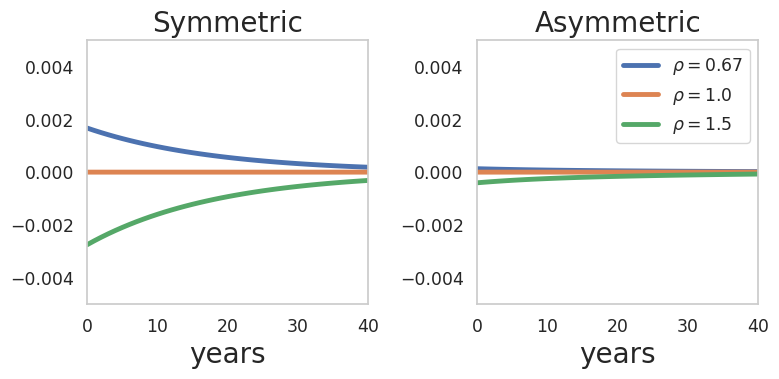

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(data = sym_gamma_8_rho_067_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], ax = axes[0])
sns.lineplot(data = sym_gamma_8_rho_1_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], ax = axes[0])
sns.lineplot(data = sym_gamma_8_rho_15_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], ax = axes[0])
axes[0].set_xlim([0,40])
axes[0].set_ylim([-0.005,0.005])
axes[0].set_title('Symmetric',fontsize=20)
sns.lineplot(data = asym_gamma_8_rho_067_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], label = '$\\rho = 0.67$', ax = axes[1])
sns.lineplot(data = asym_gamma_8_rho_1_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], label = '$\\rho = 1.0$', ax = axes[1])
sns.lineplot(data = asym_gamma_8_rho_15_kappa_0['elasticity_logimo']['exposure_elasticity'].item().firstType[0,2,:], label = '$\\rho = 1.5$', ax = axes[1])
axes[1].set_xlim([0,40])
axes[1].set_ylim([-0.005,0.005])
axes[1]
axes[1].set_title('Asymmetric',fontsize=20)
axes[0].set_xlabel('years', fontsize=20)
axes[1].set_xlabel('years', fontsize=20)
#fig.suptitle('Twocapital Investment Output Exposure Elasticity')
plt.tight_layout()
axes[0].grid(False)
axes[1].grid(False)
plt.show()

# Consumption Exposure Elasticities

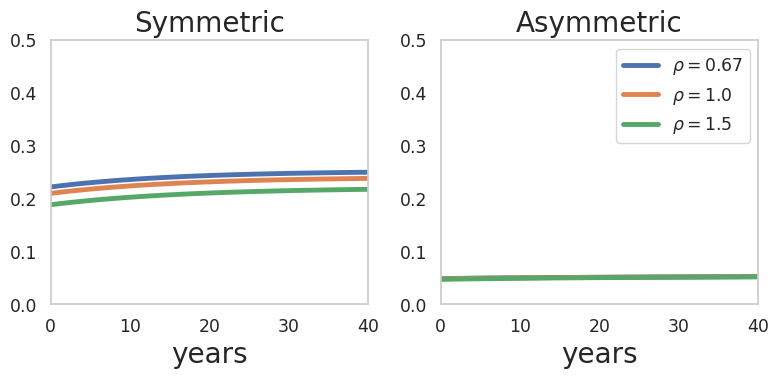

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(data = sym_gamma_8_rho_067_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], ax = axes[0])
sns.lineplot(data = sym_gamma_8_rho_1_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], ax = axes[0])
sns.lineplot(data = sym_gamma_8_rho_15_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], ax = axes[0])
axes[0].set_xlim([0,40])
axes[0].set_ylim([0.0,0.5])
axes[0].set_title('Symmetric',fontsize=20)
sns.lineplot(data = asym_gamma_8_rho_067_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], label = '$\\rho = 0.67$', ax = axes[1])
sns.lineplot(data = asym_gamma_8_rho_1_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], label = '$\\rho = 1.0$', ax = axes[1])
sns.lineplot(data = asym_gamma_8_rho_15_kappa_0['elasticity_logc']['price_elasticity'].item().firstType[0,2,:], label = '$\\rho = 1.5$', ax = axes[1])
axes[1].set_xlim([0,40])
axes[1].set_ylim([0.0,0.5])
axes[1]
axes[1].set_title('Asymmetric',fontsize=20)
axes[0].set_xlabel('years', fontsize=20)
axes[1].set_xlabel('years', fontsize=20)
#fig.suptitle('Twocapital Investment Output Exposure Elasticity')
plt.tight_layout()
axes[0].grid(False)
axes[1].grid(False)
plt.show()

# Stationary Density

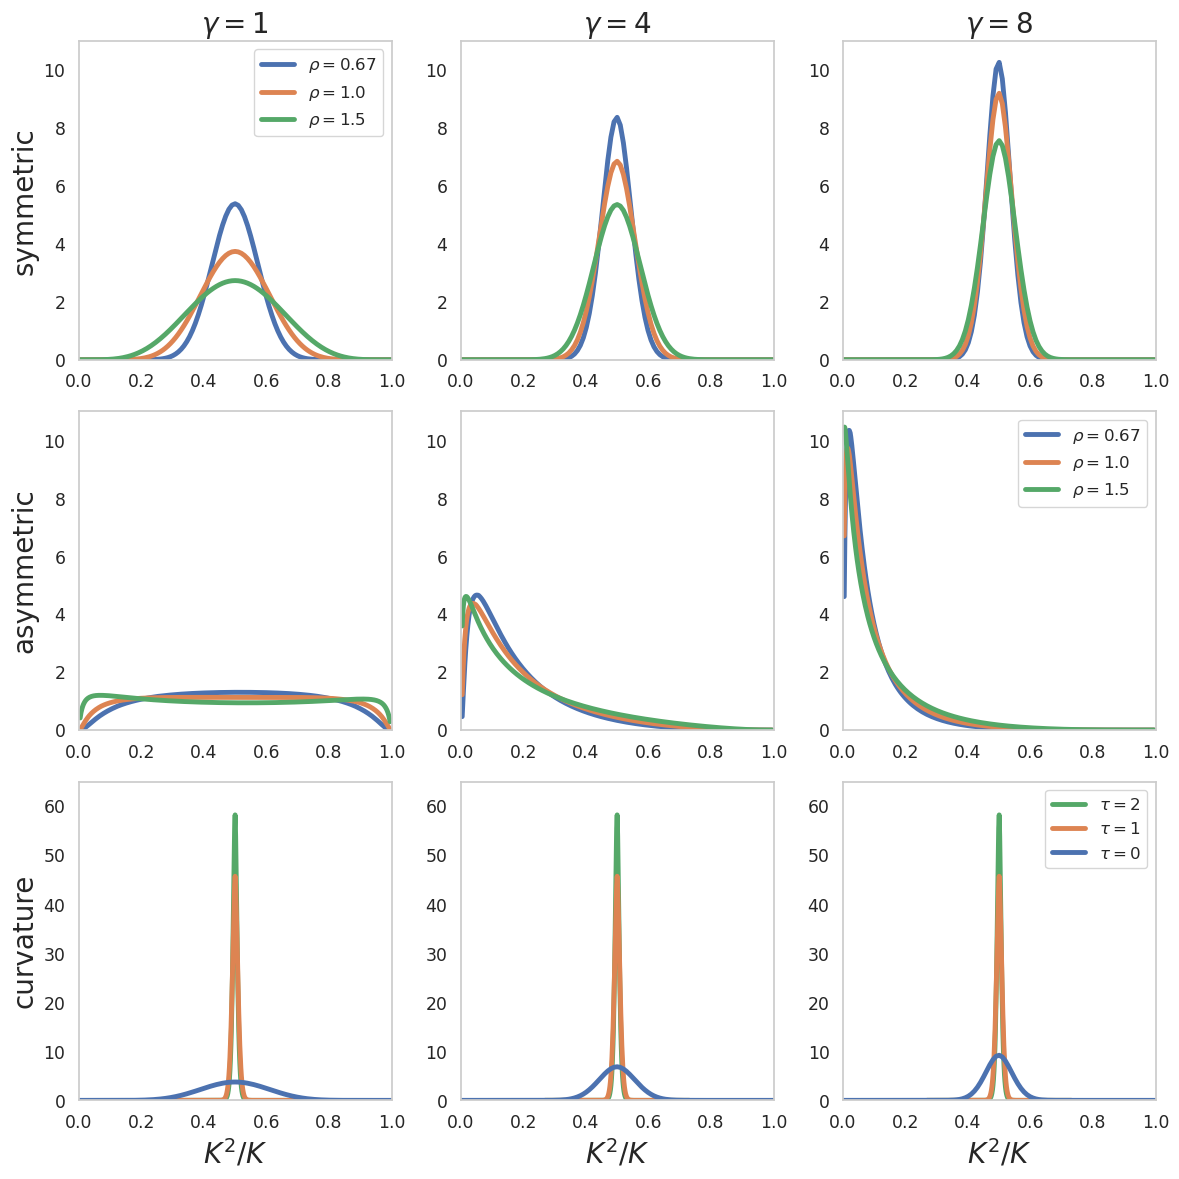

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

sns.lineplot(x = sym_gamma_1_rho_067_kappa_0['rr'], y = sym_gamma_1_rho_067_kappa_0['g_R'], label = '$\\rho = 0.67$', ax = axes[0,0])
sns.lineplot(x = sym_gamma_1_rho_1_kappa_0['rr'],   y = sym_gamma_1_rho_1_kappa_0['g_R'], label = '$\\rho = 1.0$', ax = axes[0,0])
sns.lineplot(x = sym_gamma_1_rho_15_kappa_0['rr'],  y = sym_gamma_1_rho_15_kappa_0['g_R'], label = '$\\rho = 1.5$', ax = axes[0,0])
axes[0,0].set_xlim([0.01,1.0])
axes[0,0].set_ylim([0.0,11.0])
axes[0,0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])

sns.lineplot(x = sym_gamma_4_rho_067_kappa_0['rr'], y = sym_gamma_4_rho_067_kappa_0['g_R'],  label = '$\\rho = 0.67$', ax = axes[0,1])
sns.lineplot(x = sym_gamma_4_rho_1_kappa_0['rr'],   y = sym_gamma_4_rho_1_kappa_0['g_R'], label = '$\\rho = 1.0$', ax = axes[0,1])
sns.lineplot(x = sym_gamma_4_rho_15_kappa_0['rr'],  y = sym_gamma_4_rho_15_kappa_0['g_R'], label = '$\\rho = 1.5$', ax = axes[0,1])
axes[0,1].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axes[0,1].set_xlim([0.01,1.0])
axes[0,1].set_ylim([0.0,11.0])
axes[0,1].get_legend().remove()

sns.lineplot(x = sym_gamma_8_rho_067_kappa_0['rr'], y = sym_gamma_8_rho_067_kappa_0['g_R'],  label = '$\\rho = 0.67$', ax = axes[0,2])
sns.lineplot(x = sym_gamma_8_rho_1_kappa_0['rr'],   y = sym_gamma_8_rho_1_kappa_0['g_R'], label = '$\\rho = 1.0$', ax = axes[0,2])
sns.lineplot(x = sym_gamma_8_rho_15_kappa_0['rr'],  y = sym_gamma_8_rho_15_kappa_0['g_R'], label = '$\\rho = 1.5$', ax = axes[0,2])

axes[0,2].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axes[0,2].set_xlim([0.01,1.0])
axes[0,2].set_ylim([0.0,11.0])
axes[0,2].get_legend().remove()

boundary_cutoff = 15
sns.lineplot(x = asym_gamma_1_rho_067_kappa_0['rr'][boundary_cutoff:-boundary_cutoff], y = asym_gamma_1_rho_067_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff],  label = '$\\rho = 0.67$', ax = axes[1,0])
sns.lineplot(x = asym_gamma_1_rho_1_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],   y = asym_gamma_1_rho_1_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.0$', ax = axes[1,0])
sns.lineplot(x = asym_gamma_1_rho_15_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],  y = asym_gamma_1_rho_15_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.5$', ax = axes[1,0])
axes[1,0].set_xlim([0.01,1.0])
axes[1,0].set_ylim([0.0,11.0])
axes[1,0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axes[1,0].legend().remove()

sns.lineplot(x = asym_gamma_4_rho_067_kappa_0['rr'][boundary_cutoff:-boundary_cutoff], y = asym_gamma_4_rho_067_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 0.67$', ax = axes[1,1])
sns.lineplot(x = asym_gamma_4_rho_1_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],   y = asym_gamma_4_rho_1_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.0$', ax = axes[1,1])
sns.lineplot(x = asym_gamma_4_rho_15_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],  y = asym_gamma_4_rho_15_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.5$', ax = axes[1,1])
axes[1,1].set_xlim([0.01,1.0])
axes[1,1].set_ylim([0.0,11.0])
axes[1,1].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axes[1,1].legend().remove()

sns.lineplot(x = asym_gamma_8_rho_067_kappa_0['rr'][boundary_cutoff:-boundary_cutoff], y  = asym_gamma_8_rho_067_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 0.67$', ax = axes[1,2])
sns.lineplot(x = asym_gamma_8_rho_1_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],   y  = asym_gamma_8_rho_1_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.0$', ax = axes[1,2])
sns.lineplot(x = asym_gamma_8_rho_15_kappa_0['rr'][boundary_cutoff:-boundary_cutoff],  y  = asym_gamma_8_rho_15_kappa_0['g_R'][boundary_cutoff:-boundary_cutoff], label = '$\\rho = 1.5$', ax = axes[1,2])
axes[1,2].set_xlim([0.01,1.0])
axes[1,2].set_ylim([0.0,11.0])
axes[1,2].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])

sns.lineplot(x = sym_gamma_1_rho_1_kappa_2['rr'], y  = sym_gamma_1_rho_1_kappa_2['g_R'], label = '$\\tau = 2$', ax = axes[2,0],color="#55a868")
sns.lineplot(x = sym_gamma_1_rho_1_kappa_1['rr'], y  = sym_gamma_1_rho_1_kappa_1['g_R'], label = '$\\tau = 1$', ax = axes[2,0],color='#dd8452')
sns.lineplot(x = sym_gamma_1_rho_1_kappa_0['rr'], y  = sym_gamma_1_rho_1_kappa_0['g_R'], label = '$\\tau = 0$', ax = axes[2,0], color='#4c72b0')
axes[2,0].set_xlim([0.0,1.0])
axes[2,0].set_ylim([0.0,65.0])
axes[2,0].legend().remove()

sns.lineplot(x = sym_gamma_4_rho_1_kappa_2['rr'], y  = sym_gamma_4_rho_1_kappa_2['g_R'], label = '$\\tau = 2$', ax = axes[2,1], color="#55a868")
sns.lineplot(x = sym_gamma_4_rho_1_kappa_1['rr'], y  = sym_gamma_4_rho_1_kappa_1['g_R'], label = '$\\tau = 1$', ax = axes[2,1],color='#dd8452')
sns.lineplot(x = sym_gamma_4_rho_1_kappa_0['rr'], y  = sym_gamma_4_rho_1_kappa_0['g_R'], label = '$\\tau = 0$', ax = axes[2,1], color='#4c72b0')
axes[2,1].set_xlim([0.0,1.0])
axes[2,1].set_ylim([0.0,65.0])
axes[2,1].legend().remove()

sns.lineplot(x = sym_gamma_8_rho_1_kappa_2['rr'], y  = sym_gamma_8_rho_1_kappa_2['g_R'], label = '$\\tau = 2$', ax = axes[2,2], color="#55a868")
sns.lineplot(x = sym_gamma_8_rho_1_kappa_1['rr'], y  = sym_gamma_8_rho_1_kappa_1['g_R'], label = '$\\tau = 1$', ax = axes[2,2],color='#dd8452')
sns.lineplot(x = sym_gamma_8_rho_1_kappa_0['rr'], y  = sym_gamma_8_rho_1_kappa_0['g_R'], label = '$\\tau = 0$', ax = axes[2,2], color='#4c72b0')
axes[2,2].set_xlim([0.0,1.0])
axes[2,2].set_ylim([0.0,65.0])

axes[0,0].set_title(r'$\gamma = 1$', fontsize=20)
axes[0,1].set_title('$\\gamma = 4$', fontsize=20)
axes[0,2].set_title('$\\gamma = 8$', fontsize=20)

axes[0,0].set_ylabel('symmetric', fontsize=20)
axes[1,0].set_ylabel('asymmetric', fontsize=20)
axes[2,0].set_ylabel('curvature', fontsize=20)

axes[2,0].set_xlabel(r'$K^2/K$', fontsize=20)
axes[2,1].set_xlabel(r'$K^2/K$', fontsize=20)
axes[2,2].set_xlabel(r'$K^2/K$', fontsize=20)

for ax in axes.flatten():
    ax.grid(False)
    ax.set_xlim([0,1])

axes[0,0].legend(fontsize=12)
axes[1,2].legend(fontsize=12)
axes[2,2].legend(fontsize=12)
plt.tight_layout()
plt.show()